In [1]:
import os, time
import matplotlib.pyplot as plt
import numpy as np
import dgl
import dgl.function as fn
import pickle as pkl
import torch
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve
from xgnn_src.node.teacher import GCN_MLP2
import torch.nn.functional as F

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import seaborn
import matplotlib.ticker as ticker

In [3]:
from copy import deepcopy

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 8]

In [5]:
from utils import *
from xgnn_src.node.eval import *

In [6]:
Arg = collections.namedtuple("Arg", ["teacher_name", "hidden_sizes", "n_layers", "dropout", "n_hidden", "all_layer_dp", "skip_norm"])

### Using bidirected graph (default)

In [7]:
# ba_shape1.g, ba_shape.pt
with open('./datasets/tree_cycle_bidir.g', 'rb') as f:
    g = pkl.load(f)

num_classes = 2
test_labels = g.ndata['label'][g.ndata['test_mask']]
feats = g.ndata['feat'].size()[1]
arg = Arg("gcn_mlp", [64], 5, 0.5, 64, True, True)
model = init_teacher(arg, g, feats, num_classes)
ckpt = torch.load('./ckpt/gcn_mlp/tree_cycle01.pt', map_location="cuda:0")
model.load_state_dict(ckpt)

using norm in graph True
norm type: True
norm type: True
norm type: True
GCN_MLP2(
  (layers): ModuleList(
    (0): GraphConv(in=3, out=64, normalization=both, activation=None)
    (1): GraphConv(in=64, out=64, normalization=both, activation=None)
    (2): GraphConv(in=64, out=64, normalization=both, activation=None)
    (3): GraphConv(in=64, out=64, normalization=both, activation=None)
    (4): GraphConv(in=64, out=64, normalization=both, activation=None)
    (5): GraphConv(in=64, out=2, normalization=both, activation=None)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

<All keys matched successfully>

In [8]:
compute_edge_weights(model, g)

Graph(num_nodes=6, num_edges=12,
      ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool), '_ID': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float32), 'prob': Scheme(shape=(), dtype=torch.float32), '_ID': Scheme(shape=(), dtype=torch.int64)})

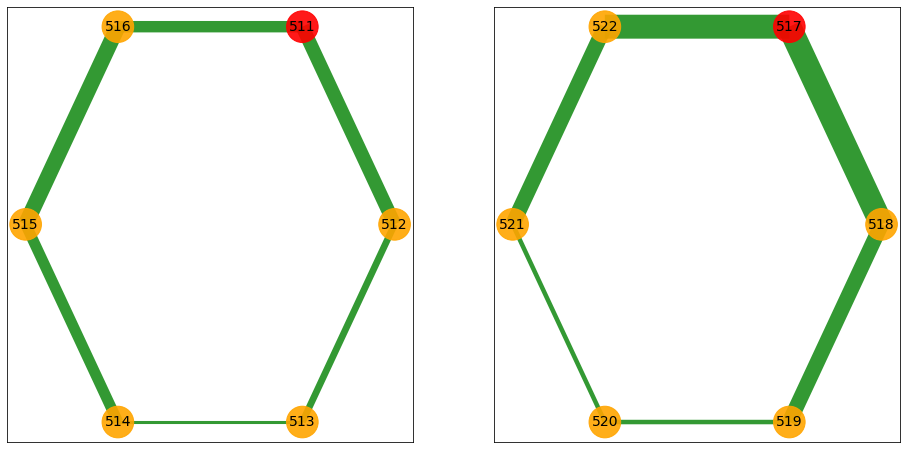

In [14]:
plt.rcParams["figure.figsize"] = [16, 8]
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.flatten()
explain_test(g, 511, 6, ax=ax[0], undir=True, scale=10, dumping_factor=0.85, num_iter=10)
# ax[0].set_axis_off()
# 103, 276, 289
explain_test(g, 517, 6, ax=ax[1], undir=True, scale=20, dumping_factor=0.5)
# ax[1].set_axis_off()
# plt.savefig('./images/ba_shape.svg', format="svg", dpi=300)

In [9]:
selected_node = list(range(511,871,6))
test_pentagon = [extract_true_motif(g, i, 510, 6) for i in selected_node]

In [24]:
s = time.time()
all_pre, all_rec, _ = evaluate_dataset(g, selected_node, test_pentagon, 6, 7, dumping_factor=0.8)
print("Test for tree circles - Precision: %.4f & Recall: %.4f F1 Score: %.4f"
          % (all_pre, all_rec, (all_pre*all_rec*2/(all_pre+all_rec))))
print(time.time() - s)

60it [00:01, 39.73it/s]

Test for tree circles - Precision: 1.0000 & Recall: 1.0000 F1 Score: 1.0000
1.5166444778442383


In [15]:
# gx = dgl.to_networkx(graphs[0])
# pos = nx.kamada_kawai_layout(gx)
# nx.draw(gx, pos)

In [11]:
s = time.time()
graphs = khop_batch(model, g, selected_node, 3)
eval_dataset2(test_pentagon, graphs)
print(time.time() - s)

F1 Score: 0.762376
P Score: 0.687500
R score: 0.855556
0.1439969539642334


In [186]:
s = time.time()
graphs = khop_batch(model, g, selected_node, 3, sym=True)
eval_dataset2(test_pentagon, graphs, selected_node)
print(time.time() - s)

F1 Score: 0.654225
P Score: 0.521919
R score: 0.876389
0.196807861328125


## TREE GRID

In [12]:
with open('./datasets/tree_grid_bidir.g', 'rb') as f:
    g1 = pkl.load(f)

num_classes = 2
test_labels1 = g1.ndata['label'][g1.ndata['test_mask']]
feats1 = g1.ndata['feat'].size()[1]
arg1 = Arg("gcn_mlp", [64], 5, 0.5, 64, True, True)
model1 = init_teacher(arg1, g1, feats1, num_classes)
ckpt1 = torch.load('./ckpt/gcn_mlp/tree_grid01.pt', map_location="cuda:0")
model1.load_state_dict(ckpt1)

using norm in graph True
norm type: True
norm type: True
norm type: True
GCN_MLP2(
  (layers): ModuleList(
    (0): GraphConv(in=3, out=64, normalization=both, activation=None)
    (1): GraphConv(in=64, out=64, normalization=both, activation=None)
    (2): GraphConv(in=64, out=64, normalization=both, activation=None)
    (3): GraphConv(in=64, out=64, normalization=both, activation=None)
    (4): GraphConv(in=64, out=64, normalization=both, activation=None)
    (5): GraphConv(in=64, out=2, normalization=both, activation=None)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

<All keys matched successfully>

In [13]:
compute_edge_weights(model1, g1)

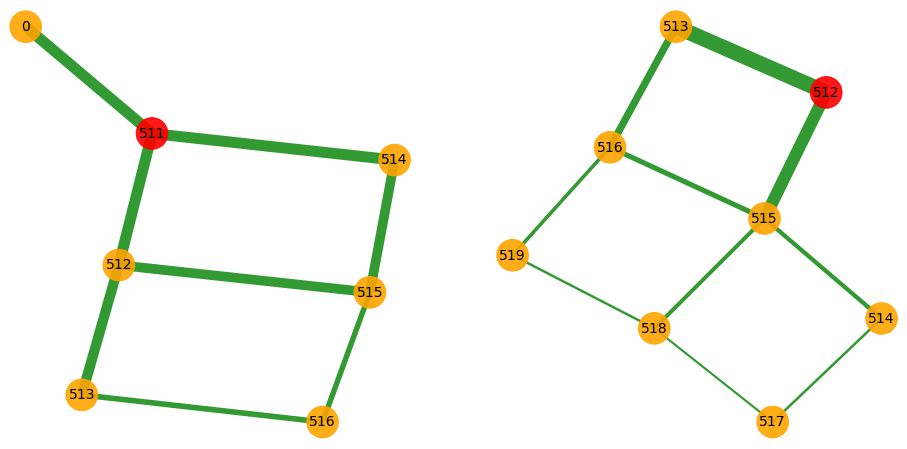

In [18]:
plt.rcParams["figure.figsize"] = [16, 8]
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.flatten()
explain_test(g1, 511, 10, ax=ax[0], scale=10, num_iter=5)
ax[0].set_axis_off()
explain_test(g1, 512, 10, ax=ax[1], scale=10, num_iter=10)
ax[1].set_axis_off()
# plt.savefig('./images/ba_community.svg', format="svg", dpi=300)

In [14]:
selected = list(range(511,800,1))
test_graphs = [extract_true_motif(g1, i, 510, 9) for i in selected]

In [15]:
t = time.time()
all_pre, all_rec, _ = evaluate_dataset(g1, selected, test_graphs, 10, 12, dumping_factor=0.9)
print("Test for tree grid - Precision: %.4f & Recall: %.4f F1: %.4f"
      % (all_pre, all_rec, (2*all_pre*all_rec/(all_pre+all_rec))))
e = time.time()
print(e - t)

289it [00:13, 21.48it/s]

Test for tree grid - Precision: 0.9490 & Recall: 0.8431 F1: 0.8930
13.476466178894043


In [9]:
s = time.time()
print(len(selected))
grid_graphs = khop_batch(model1, g1, selected, 3, sym=True)
eval_dataset2(test_graphs, grid_graphs, selected)
print(time.time() - s)

289
F1 Score: 0.523504
P Score: 0.644529
R score: 0.440744
0.7814574241638184


In [10]:
s = time.time()
print(len(selected))
grid_graphs = khop_batch(model1, g1, selected, 3, sym=False)
eval_dataset2(test_graphs, grid_graphs)
print(time.time() - s)

289
F1 Score: 0.699240
P Score: 0.756630
R score: 0.649942
0.5845823287963867


In [12]:
s = time.time()
print(len(selected))
grid_graphs = khop_batch(model1, g1, selected, 4, sym=False)
eval_dataset2(test_graphs, grid_graphs)
print(time.time() - s)

289
F1 Score: 0.571650
P Score: 0.487297
R score: 0.691321
0.7301933765411377


In [13]:
# uncomment to draw test graph from k-hop neighbor
# gx = dgl.to_networkx(test_graphs[0])
# pos = nx.kamada_kawai_layout(gx)
# nx.draw(gx, pos)